In [3]:
import bsedata
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ta as ta
from pandas.plotting import scatter_matrix
import requests
from bs4 import BeautifulSoup
import unidecode
import csv
import math
%matplotlib inline

In [5]:
data = data.iloc[::-1]
data.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
492,2-July-2018,926.0,933.15,921.45,925.30,926.224626,15764,667,14601005.0,3353,21.27,11.70,-0.70
491,3-July-2018,926.0,941.05,920.00,937.65,933.970090,21130,698,19734788.0,6180,29.25,21.05,11.65
490,4-July-2018,940.0,940.00,923.15,925.40,930.509425,12838,589,11945880.0,3456,26.92,16.85,-14.60
489,5-July-2018,930.0,946.35,921.95,936.00,930.741271,63696,1065,59284496.0,13664,21.45,24.40,6.00
488,6-July-2018,938.0,951.00,927.75,945.40,939.741691,217302,2448,204207749.0,100922,46.44,23.25,7.40


In [5]:
def display(list1,list2,name):
    fig,axes = plt.subplots(nrows = 1 , ncols = 1,figsize=(40,10))
    axes.plot(list2,list1)
    axes.set_xlabel(name)
    axes.set_ylabel("Date")

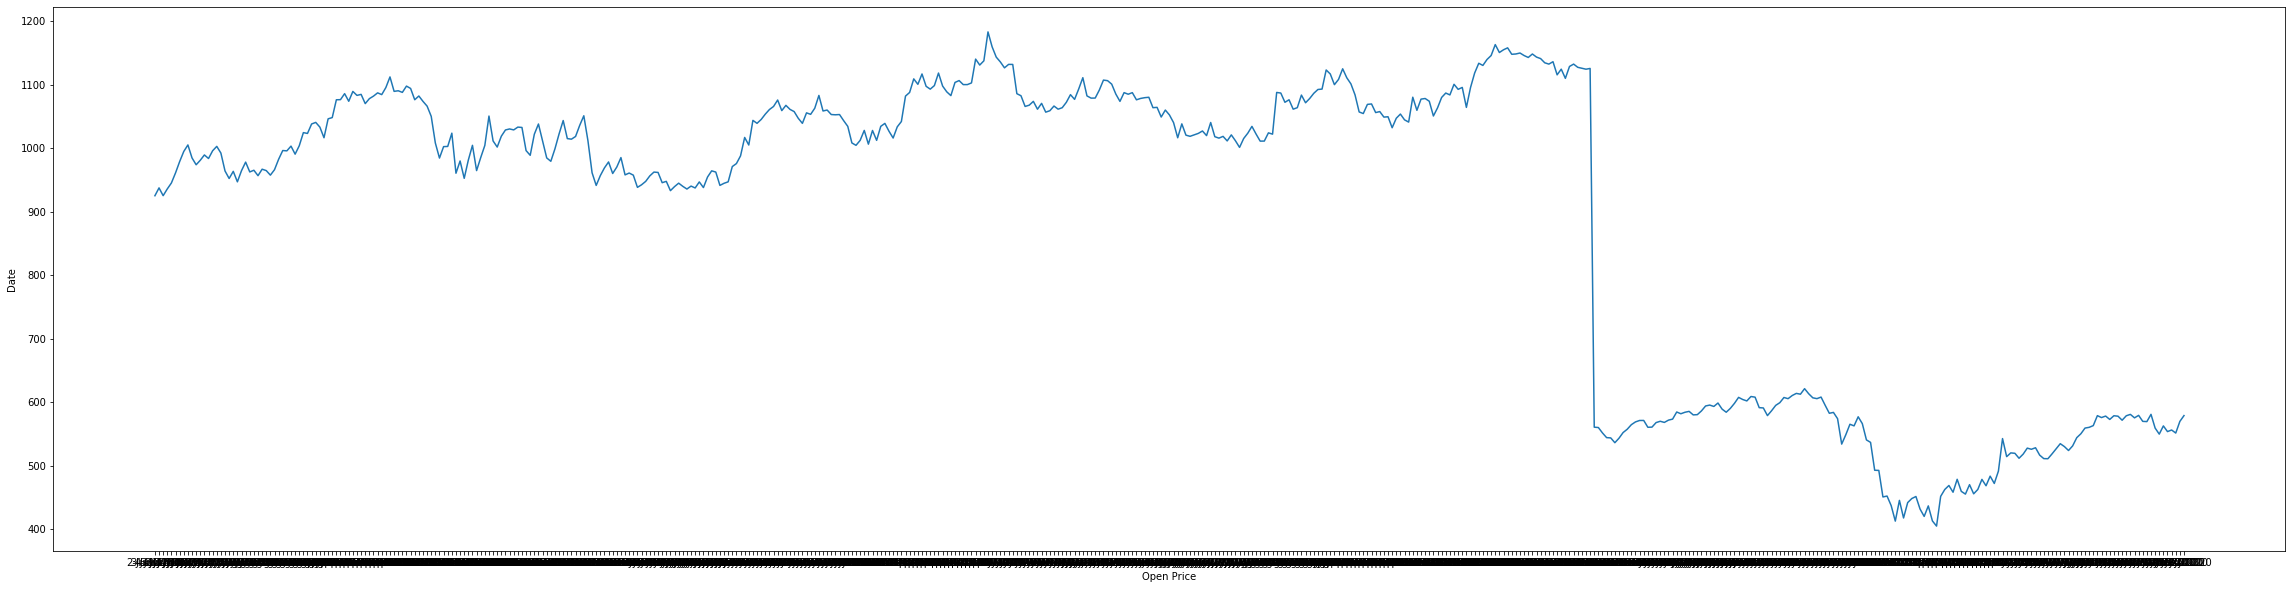

In [6]:
display(data['Close Price'][:],data['Date'][:], "Open Price")

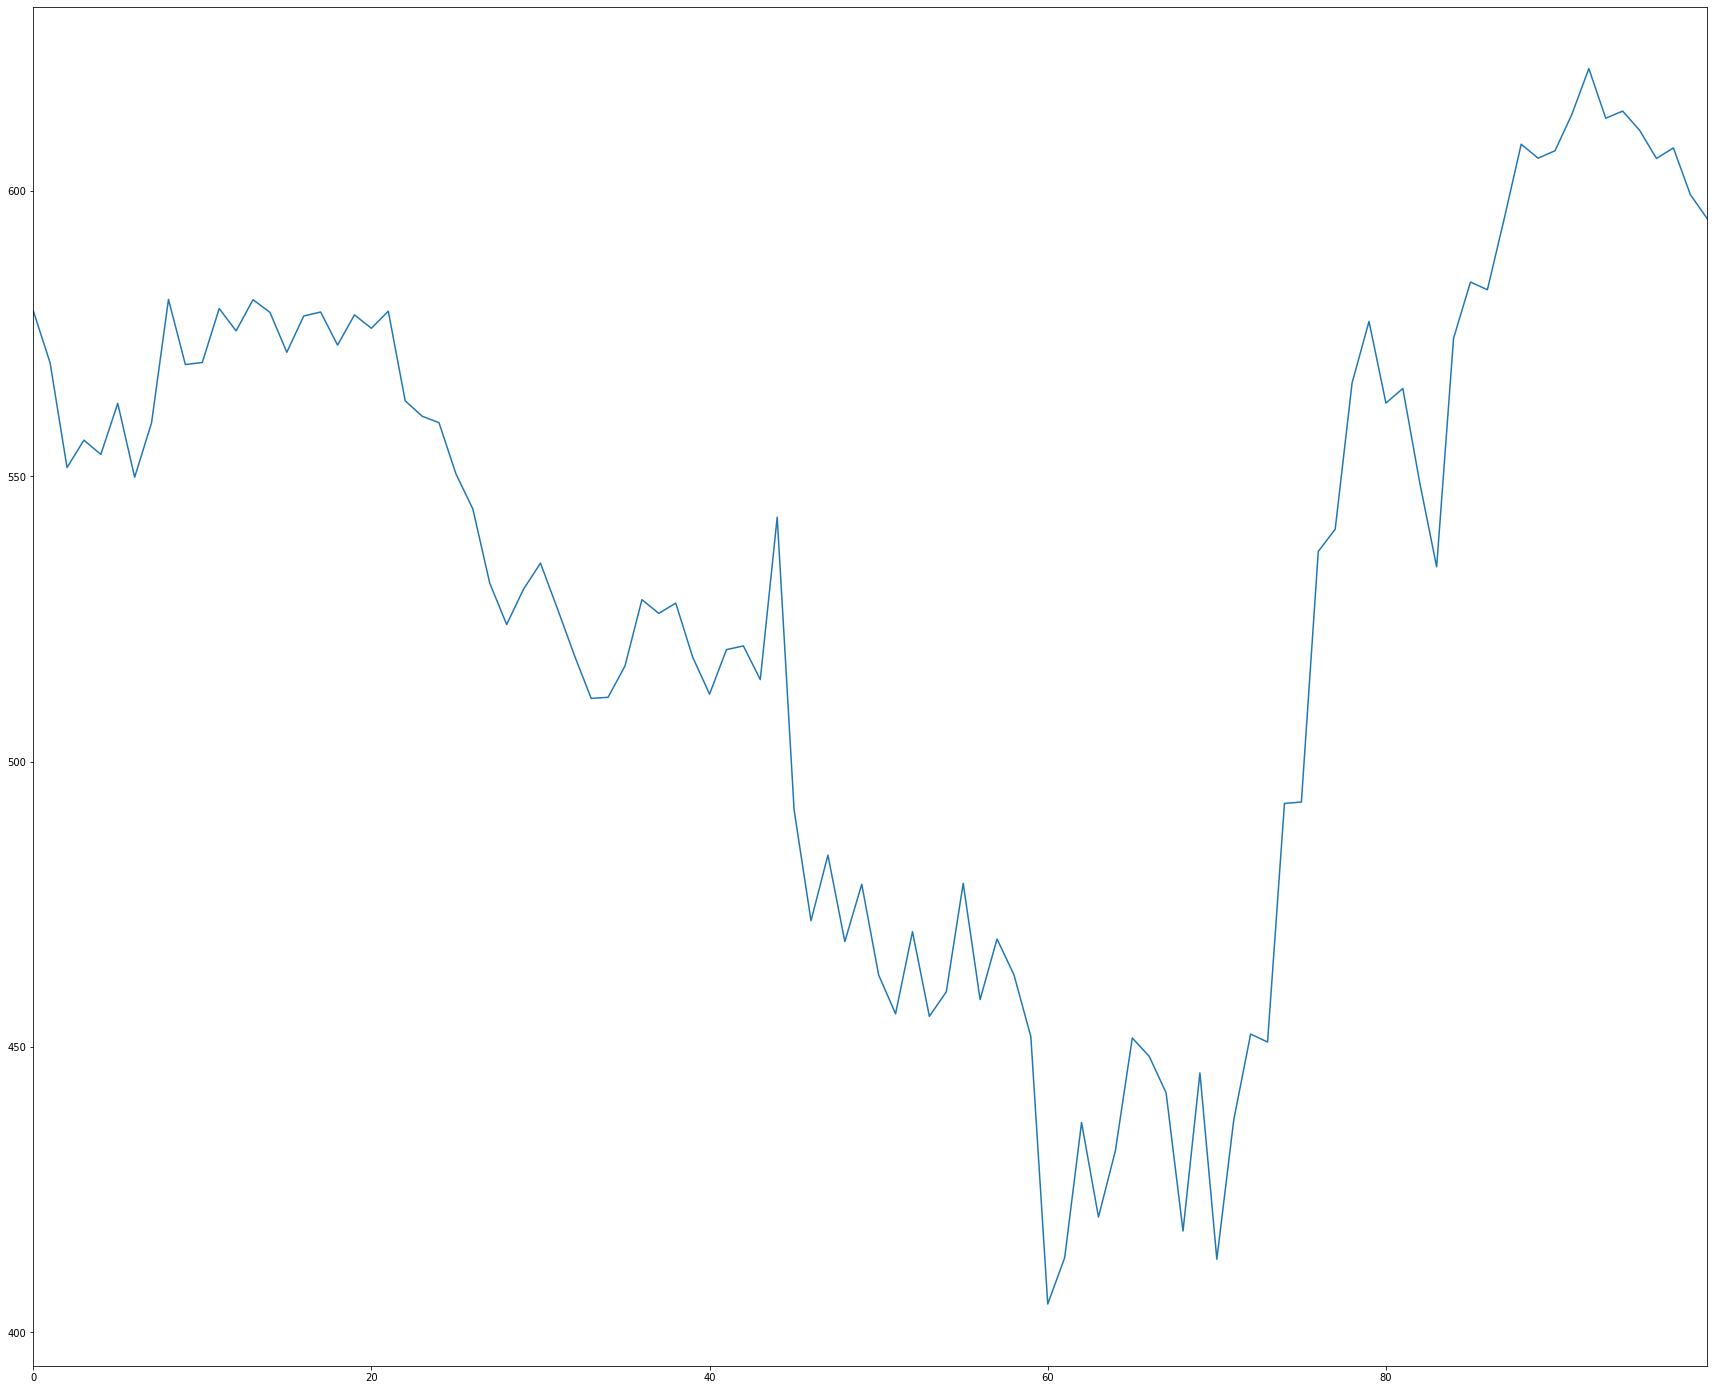

In [8]:
data['Close Price'][-100:].plot(figsize = [30,25])

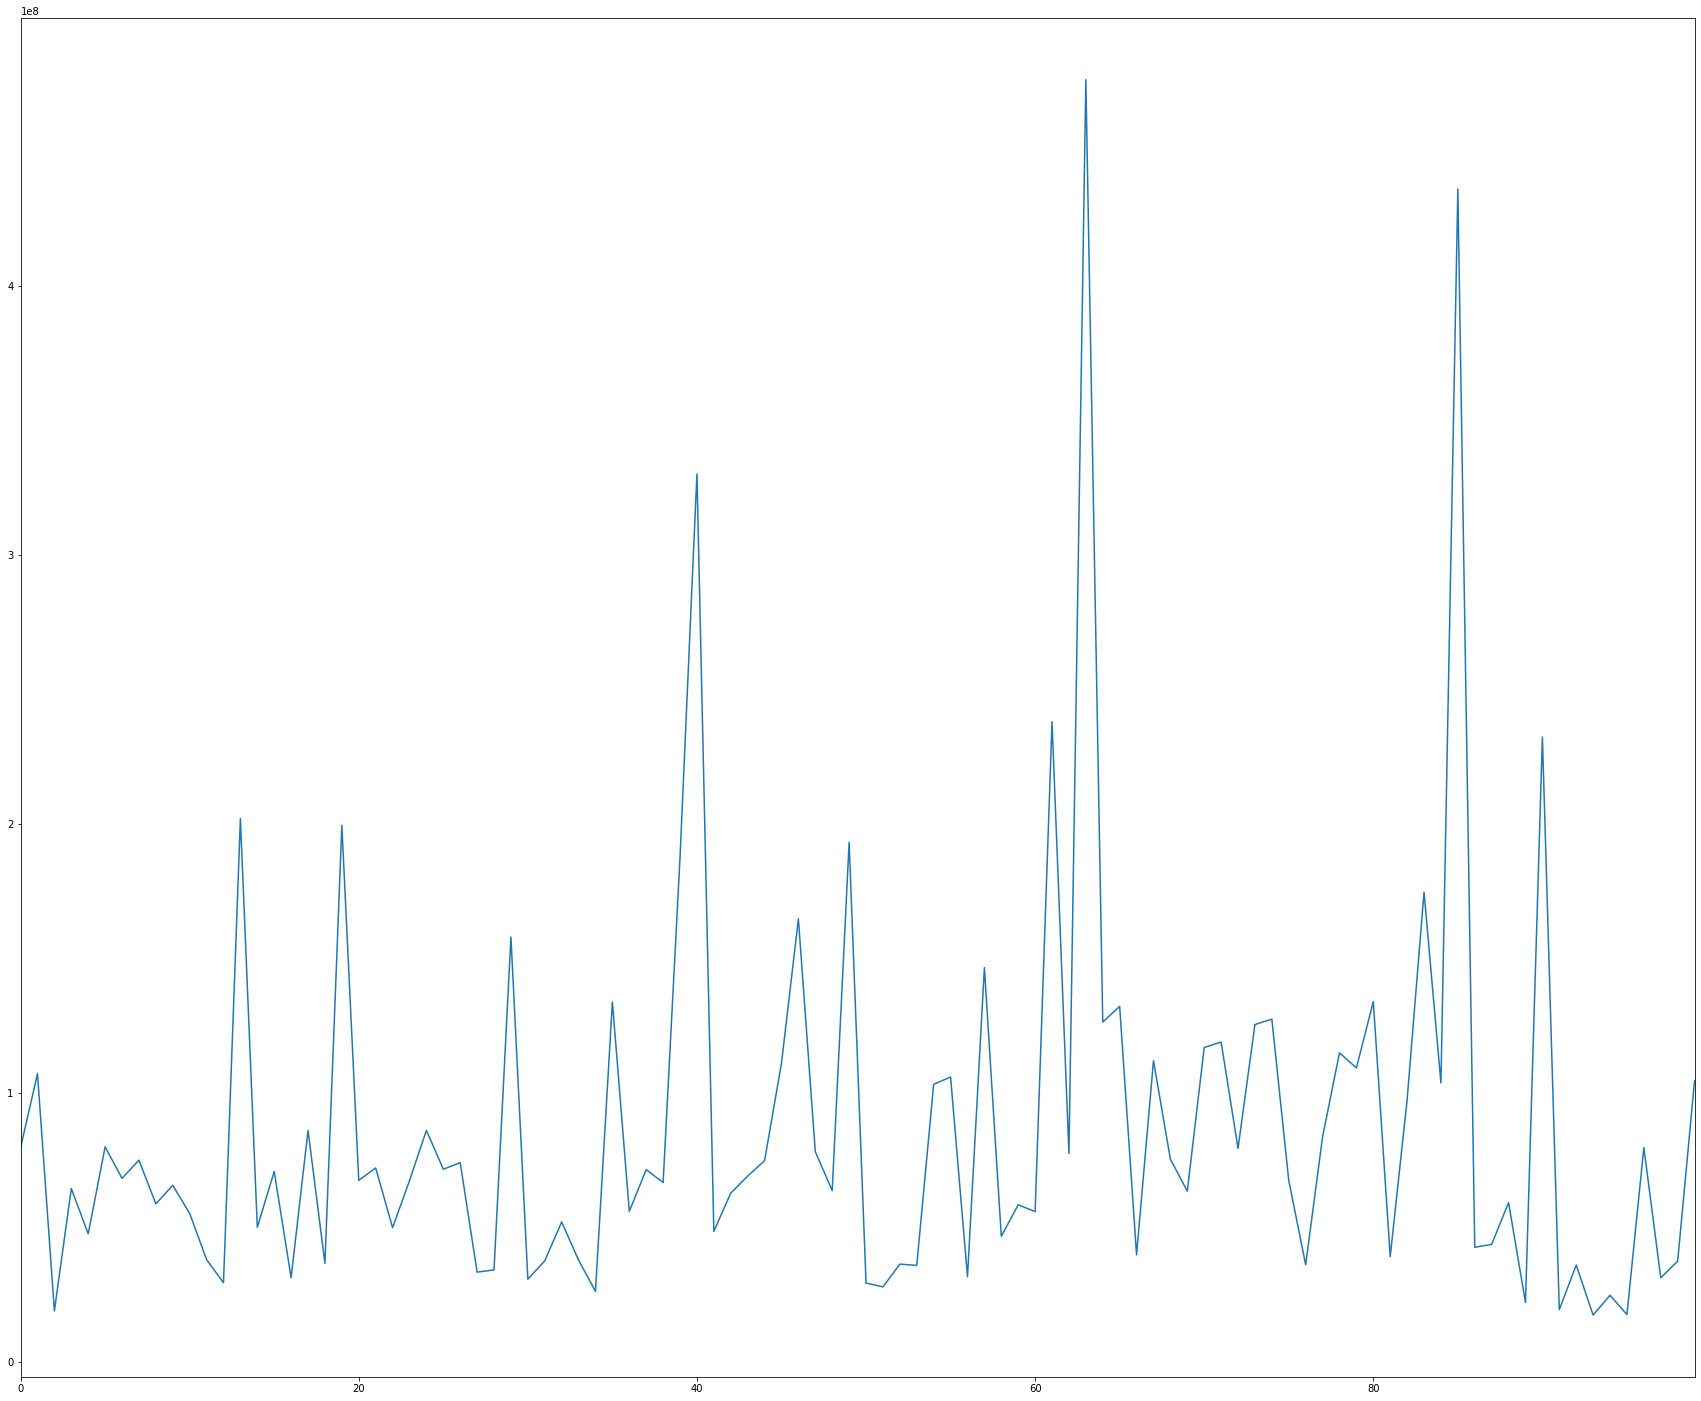

In [9]:
data['Total Turnover (Rs.)'][-100:].plot(figsize = [30,25])

In [67]:
# Returns simple moving average on the basis of initial_date column_no and days and period
def sma(series, period):
    sma_series = pd.Series()
    sma_series = series.rolling(window=10).mean()
    sma_series[-100:].plot(figsize = [30,25])
    plt.plot(data['Open Price'][-100:])
    return sma_series

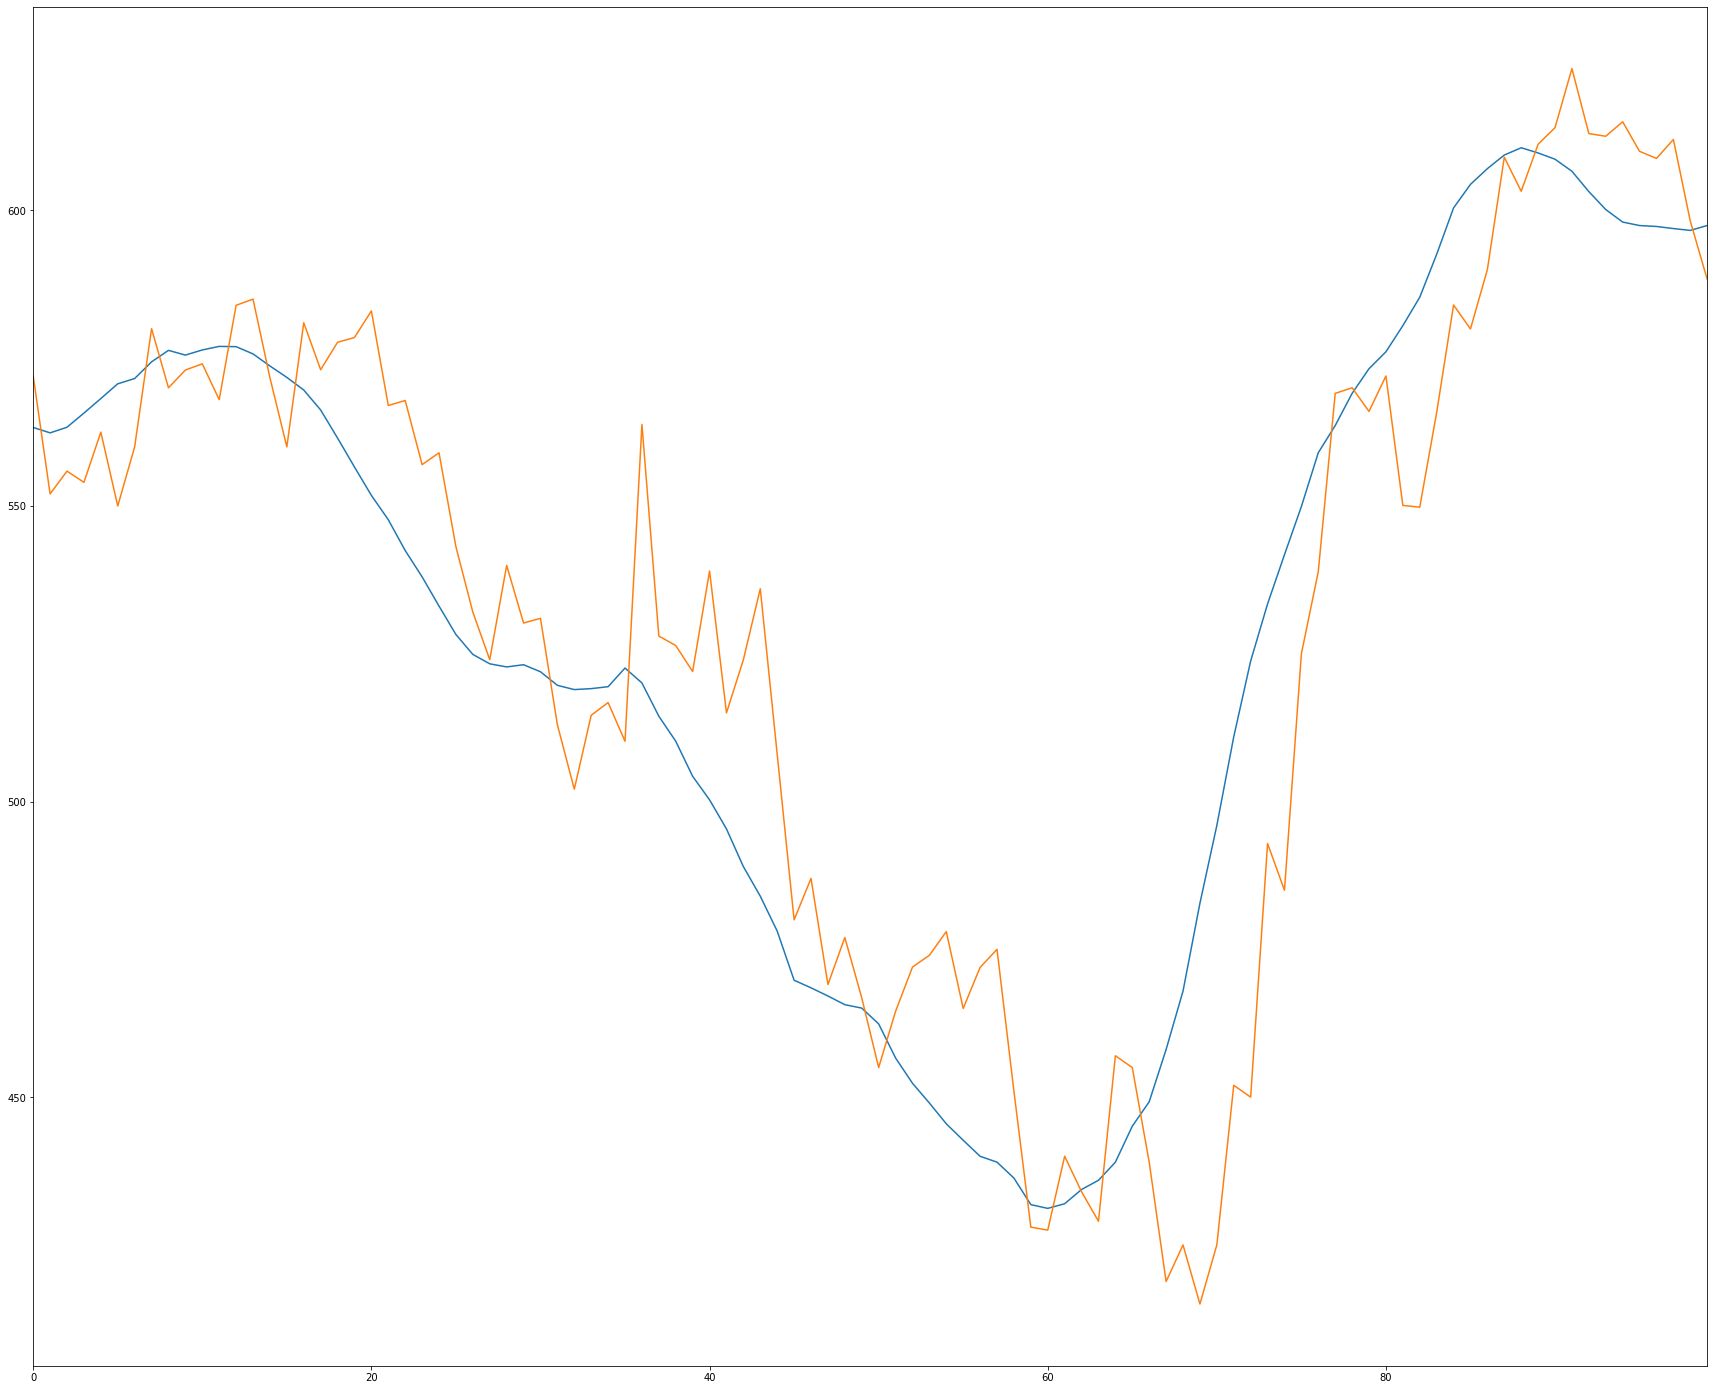

In [68]:
sma(data['Close Price'],3);

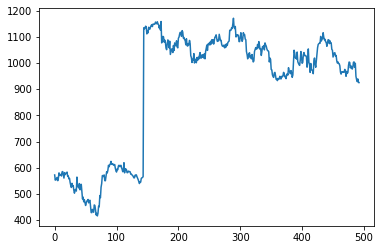

In [14]:
# Returns simple moving average on the basis of initial_date column_no and days and period
def ema(series, period):
    sma_series = pd.Series()
    sma_series = series.ewm(span=22,adjust=True).mean()
    sma_series[-100:].plot(figsize = [30,25])
    plt.plot(data['Open Price'][-100:])
    return sma_series

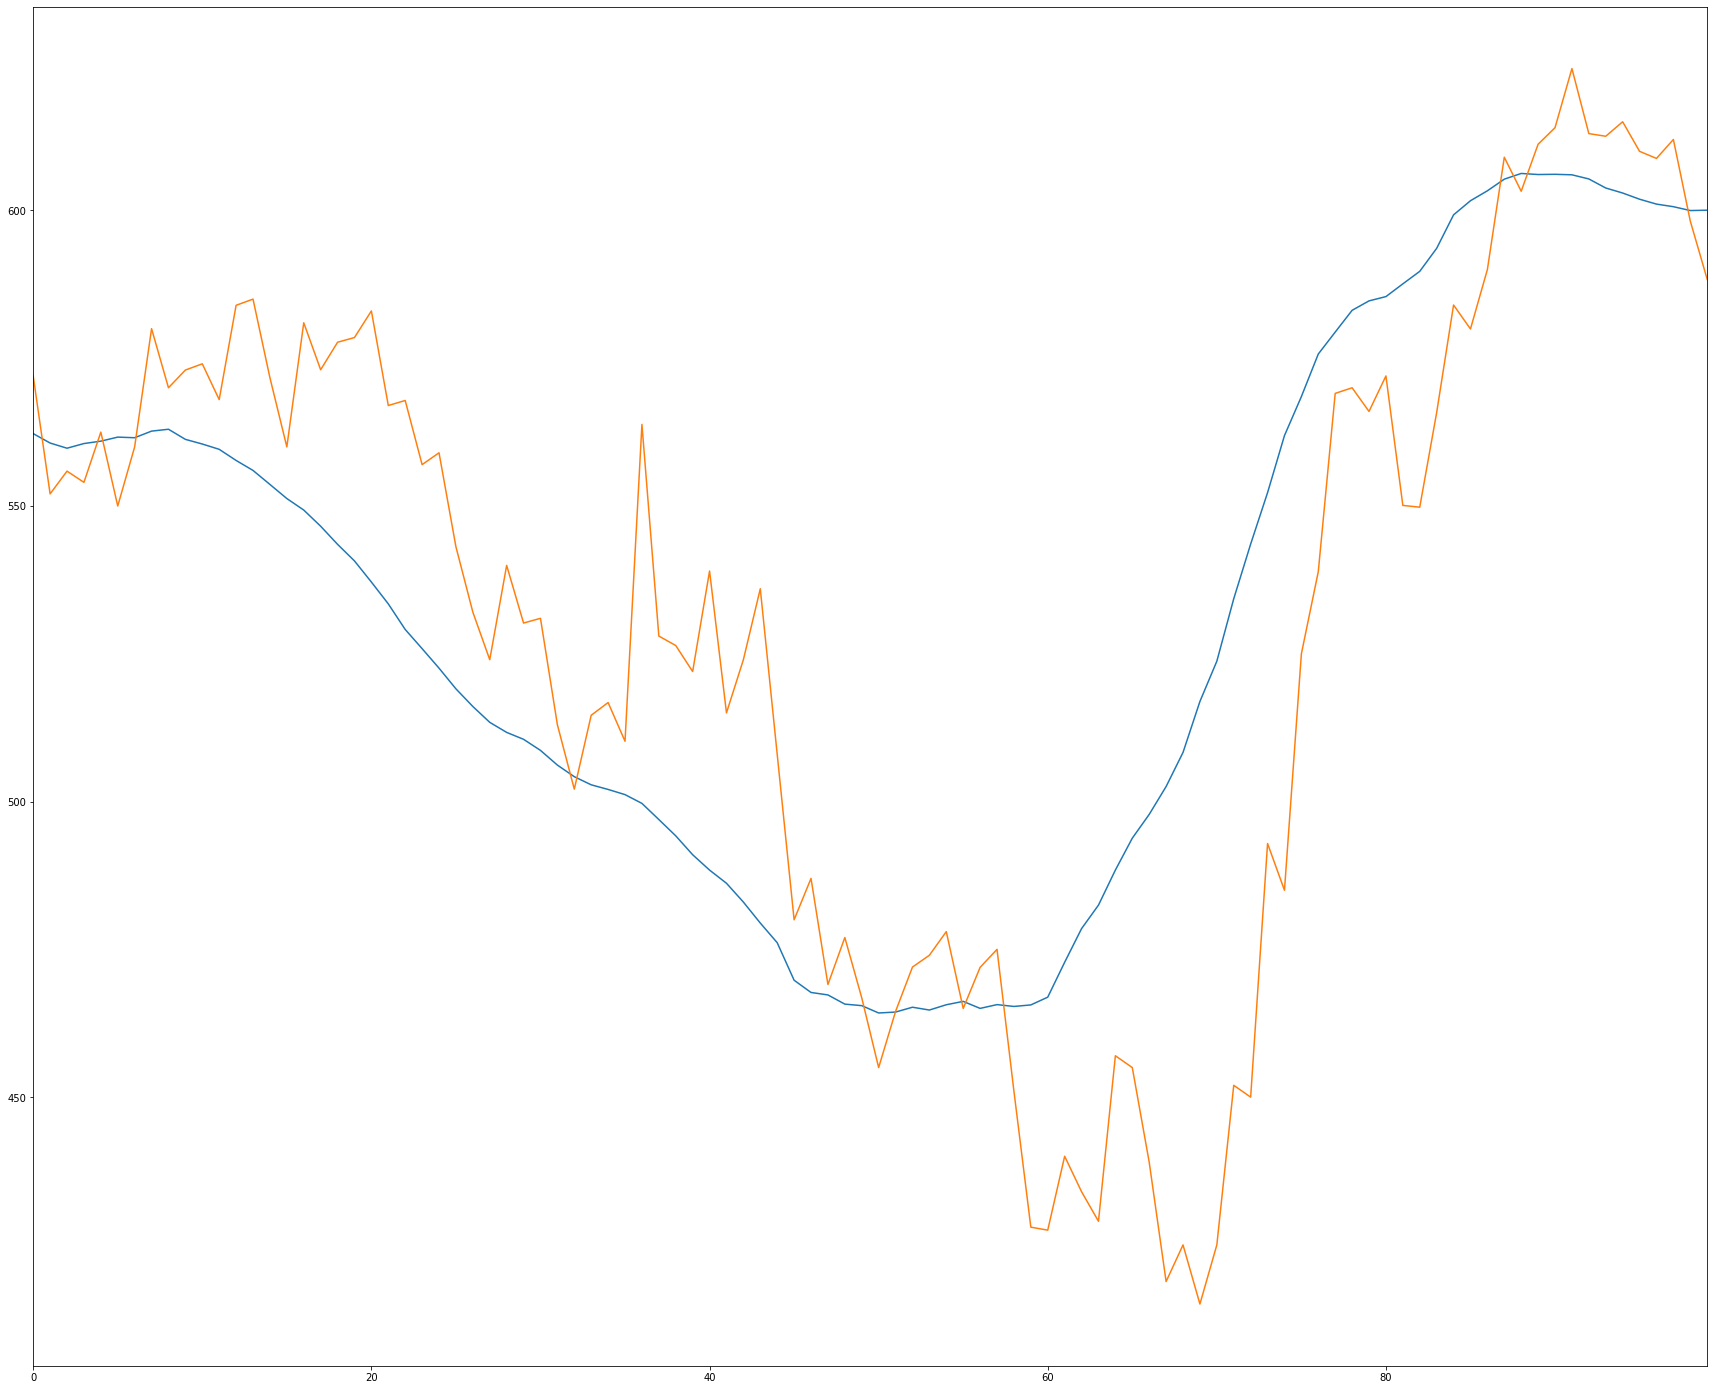

In [15]:
ema(data['Close Price'],3);

In [23]:
data_full = pd.read_csv("hcl_full.csv") 

In [80]:
data_full.head()
data_full = data_full.iloc[::-1]
display(data_full['Close Price'][:],data_full['Date'][:], "Close Price")

2480    363.60
2479    352.70
2478    354.85
2477    359.50
2476    356.00
2475    359.70
2474    361.25
2473    364.75
2472    360.65
2471    356.80
2470    357.50
2469    373.20
2468    377.45
2467    370.75
2466    371.80
2465    371.40
2464    372.50
2463    372.65
2462    380.20
2461    372.80
2460    378.50
2459    392.30
2458    391.55
2457    391.40
2456    402.90
2455    412.70
2454    412.05
2453    415.50
2452    412.70
2451    406.20
         ...  
29      530.20
28      524.00
27      531.25
26      544.25
25      550.40
24      559.35
23      560.50
22      563.20
21      578.90
20      575.90
19      578.25
18      572.95
17      578.75
16      578.05
15      571.70
14      578.70
13      580.90
12      575.45
11      579.35
10      569.90
9       569.55
8       580.95
7       559.35
6       549.80
5       562.75
4       553.80
3       556.30
2       551.50
1       569.85
0       579.00
Name: Close Price, Length: 2481, dtype: float64

2480       1-July-2010
2479       2-July-2010
2478       5-July-2010
2477       6-July-2010
2476       7-July-2010
2475       8-July-2010
2474       9-July-2010
2473      12-July-2010
2472      13-July-2010
2471      14-July-2010
2470      15-July-2010
2469      16-July-2010
2468      19-July-2010
2467      20-July-2010
2466      21-July-2010
2465      22-July-2010
2464      23-July-2010
2463      26-July-2010
2462      27-July-2010
2461      28-July-2010
2460      29-July-2010
2459      30-July-2010
2458     2-August-2010
2457     3-August-2010
2456     4-August-2010
2455     5-August-2010
2454     6-August-2010
2453     9-August-2010
2452    10-August-2010
2451    11-August-2010
             ...      
29         22-May-2020
28         26-May-2020
27         27-May-2020
26         28-May-2020
25         29-May-2020
24         1-June-2020
23         2-June-2020
22         3-June-2020
21         4-June-2020
20         5-June-2020
19         8-June-2020
18         9-June-2020
17        1

'Close Price'

In [25]:
def test_sma(series, period):
    sma_series = pd.Series()
    sma_series = series.rolling(window=period).mean()
    i=0
    z =0
    count = 0
    fail = 0
    start=series.index[0]
    check = 0
    value = 0
    for x in series[:-1]:
        if(i==0):
            i=1
            start = start - 1
            continue
        if(math.isnan(sma_series[start])):
            start = start - 1
            continue
        if(check == 1):
            if(x<value):
                count = count + 1
            else:                
                fail = fail + 1
        if(check == 2):
            if(x>value):
                count = count + 1
            else:                
                fail = fail + 1
        if(x > sma_series[start]):
            check = 1
            value = x
        if(x < sma_series[start]):
            check = 2
            value = x
        start = start - 1
    return count, fail

In [26]:
count, fail = test_sma(data_full['Close Price'][-100:], 25)

In [27]:
print(count, fail)

35 39


In [28]:
def test_ema(series, period):
    sma_series = pd.Series()
    sma_series = series.ewm(span=period,adjust=True).mean()
    i=0
    z =0
    count = 0
    fail = 0
    start=series.index[0]
    check = 0
    value = 0
    for x in series[:-1]:
        if(i==0):
            i=1
            start = start - 1
            continue
        if(math.isnan(sma_series[start])):
            start = start - 1
            continue
        if(check == 1):
            if(x<value):
                count = count + 1
            else:                
                fail = fail + 1
        if(check == 2):
            if(x>value):
                count = count + 1
            else:                
                fail = fail + 1
        if(x > sma_series[start]):
            check = 1
            value = x
        if(x < sma_series[start]):
            check = 2
            value = x
        start = start - 1
    return count, fail

In [29]:
count, fail = test_ema(data_full['Close Price'][-100:], 20);

In [30]:
print(count, fail)

45 52


In [80]:
max_count = 0
max_fail = 0
period = 0
for i in range(2,40):
    count, fail = test_ema(data_full['Close Price'][-100:], i);
    print(count, fail, i)

53 44 2
52 45 3
50 47 4
48 49 5
47 50 6
47 50 7
45 52 8
44 53 9
44 53 10
44 53 11
44 53 12
44 53 13
44 53 14
44 53 15
44 53 16
45 52 17
45 52 18
44 53 19
45 52 20
46 51 21
47 50 22
48 49 23
48 49 24
48 49 25
49 48 26
48 49 27
49 48 28
49 48 29
49 48 30
49 48 31
50 47 32
49 48 33
49 48 34
49 48 35
48 49 36
46 51 37
46 51 38
46 51 39


In [31]:
def bollinger_band(close,period = 20,n_factor_standard_deviation = 2):
    seriesh = ta.volatility.bollinger_hband(close,n=period,ndev=n_factor_standard_deviation,fillna=False)
    seriesl= ta.volatility.bollinger_lband(close,n=period,ndev=n_factor_standard_deviation,fillna=False)
    seriesavg= ta.volatility.bollinger_mavg(close,n=period,fillna=False)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(seriesh,label = "Upper Band")
    ax.plot(seriesl,label = "Lower Band")
    ax.plot(seriesavg, label = "Average")
    ax.plot(close, label = "Price(Closing)")
    ax.set_title('bollinger_band')
    ax.legend()
    return seriesh,seriesl,seriesavg

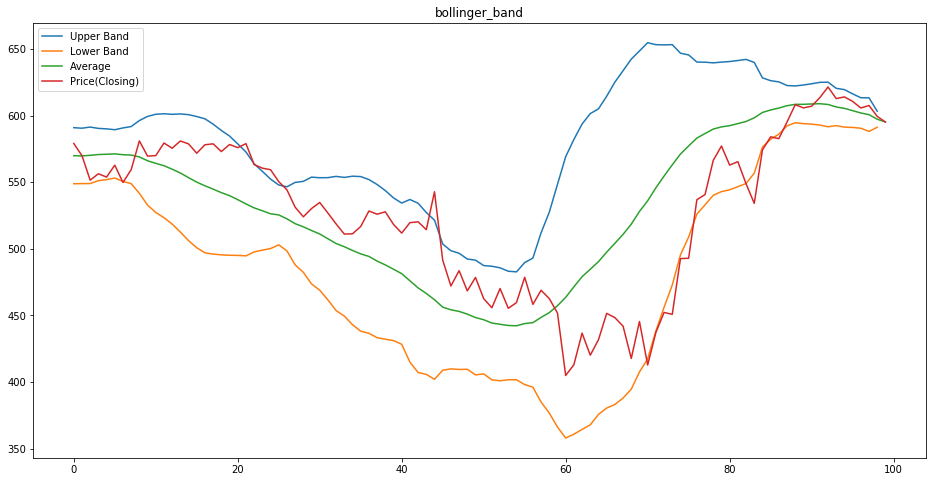

In [32]:
bollinger_band(data_full['Close Price'][-100:]);

In [33]:
# Momentum indicators
def rsi(close, period = 10):
    series = ta.momentum.rsi(close,n = period)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(series)
    ax.set_title('RSI')
    plt.axhline(y=30, color='r', linestyle='-')
    plt.axhline(y=70, color='r', linestyle='-')
    plt.xticks(rotation='vertical')
    return series

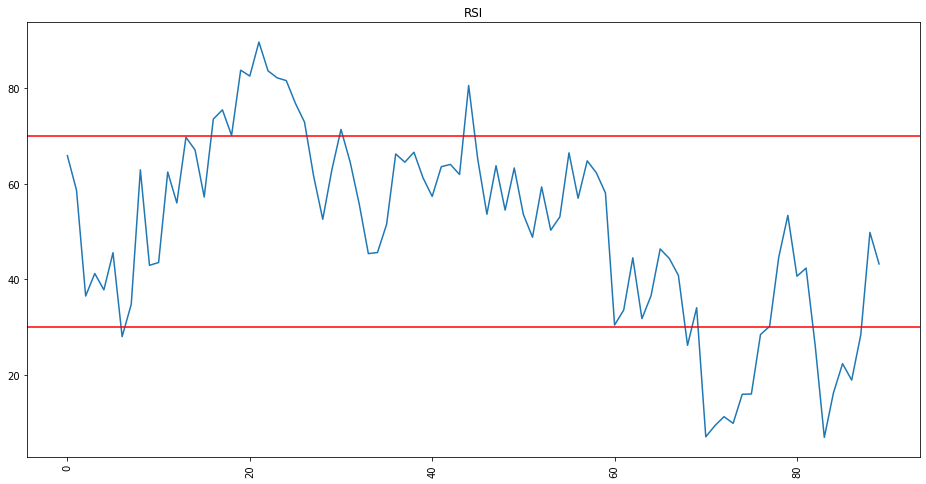

In [34]:
rsi(data_full['Close Price'][-100:]);

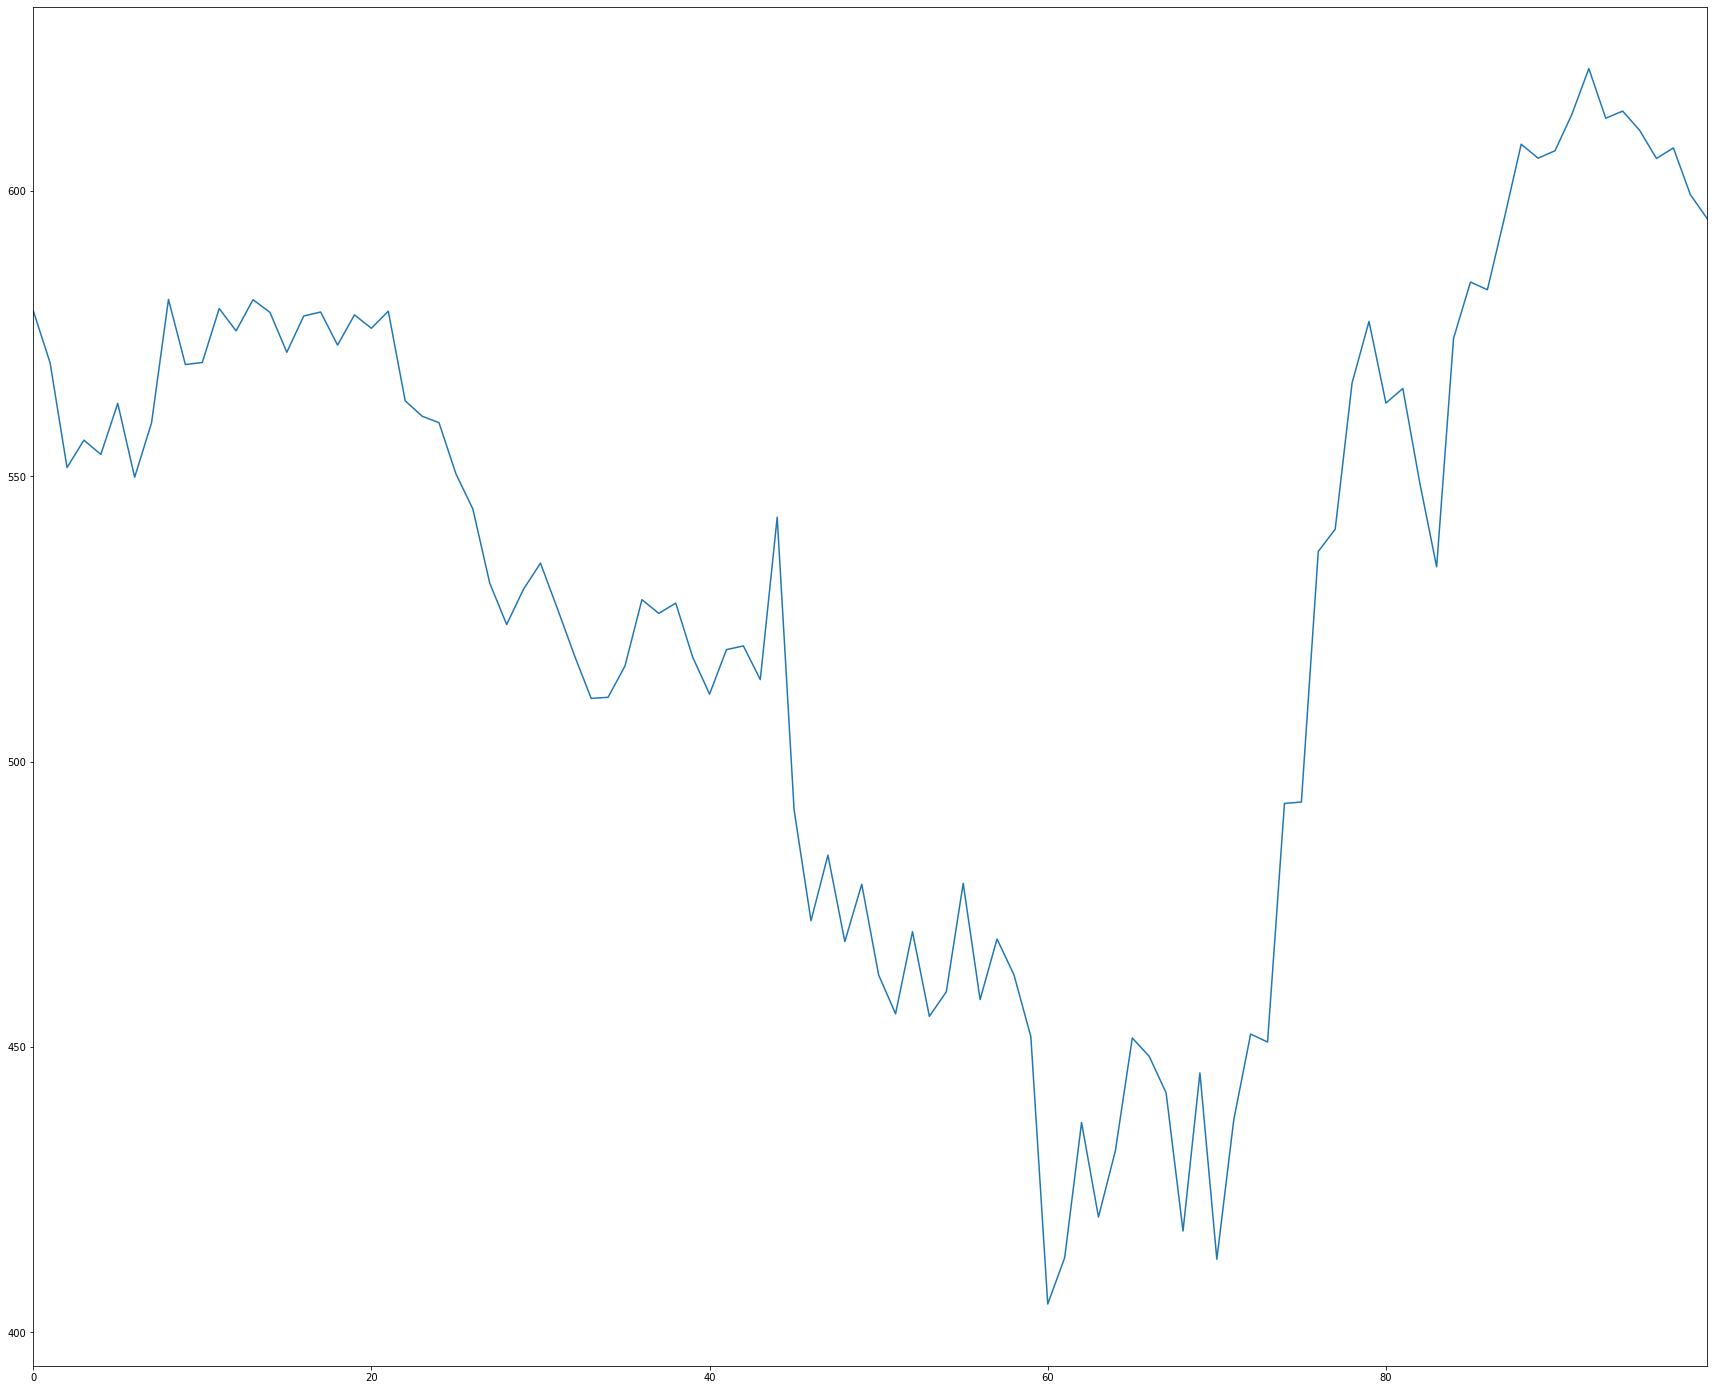

In [35]:
data_full['Close Price'][-100:].plot(figsize = [30,25])

In [36]:
from bsedata.bse import BSE
b = BSE()
print(b)

Driver Class for Bombay Stock Exchange (BSE)


In [37]:
q = b.getQuote('532281')
print(q)

{'companyName': 'HCL TECHNOLOGIES LTD.', 'currentValue': '578.00', 'change': '-1.00', 'pChange': '-0.17', 'updatedOn': '06 Jul 20 | 04:00 PM', 'priceBand': '', 'securityID': 'HCLTECH', 'scripCode': '532281', 'group': 'A  / S&P BSE SENSEX', 'faceValue': '2.00', 'industry': 'IT Consulting & Software', 'previousClose': '579.00', 'previousOpen': '579.00', 'dayHigh': '588.95', 'dayLow': '577.50', '52weekHigh': '624.00', '52weekLow': '375.50', 'weightedAvgPrice': '583.45', 'totalTradedValue': '4.45 Cr.', 'totalTradedQuantity': '0.76 Lakh', '2WeekAvgQuantity': '1.18 Lakh', 'marketCapFull': '1,56,849.84 Cr.', 'marketCapFreeFloat': '62,739.94 Cr.', 'upperPriceBand': '', 'lowerPriceBand': '', 'buy': {'1': {'quantity': '-', 'price': '0.00'}, '2': {'quantity': '-', 'price': '0.00'}, '3': {'quantity': '-', 'price': '0.00'}, '4': {'quantity': '-', 'price': '0.00'}, '5': {'quantity': '-', 'price': '0.00'}}, 'sell': {'1': {'price': '0.00', 'quantity': '-'}, '2': {'price': '0.00', 'quantity': '-'}, '3'

In [38]:
tg = b.topGainers()
for t in tg:
    print(t["securityID"])

ITI
TRITURBINE
BRIGADE
BDL
BHEL


In [50]:
data_full.tail()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
4,29-June-2020,562.50,565.90,550.45,553.80,558.569377,85072,3347,47518614.0,19314.0,22.70,15.45,-8.7
3,30-June-2020,554.00,560.60,553.60,556.30,556.640170,115574,5234,64333131.0,66114.0,57.20,7.00,2.3
2,1-July-2020,555.90,559.45,551.00,551.50,554.300855,34043,1148,18870064.0,12014.0,35.29,8.45,-4.4
1,2-July-2020,552.05,572.05,551.00,569.85,565.784506,189170,3728,107029455.0,47826.0,25.28,21.05,17.8
0,3-July-2020,572.00,580.35,571.00,579.00,576.537870,137972,4633,79546083.0,62154.0,45.05,9.35,7.0


In [51]:
47518614/558

85158.80645161291

In [57]:
def MoneyFlowIndex(high, low, close, volume, period = 14):
    series = ta.momentum.money_flow_index(high, low, close, volume, n = period)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(series)
    ax.set_title('KAMAIndicator')
    plt.axhline(y=30, color='r', linestyle='-')
    plt.axhline(y=70, color='r', linestyle='-')
    plt.xticks(rotation='vertical')
    return series

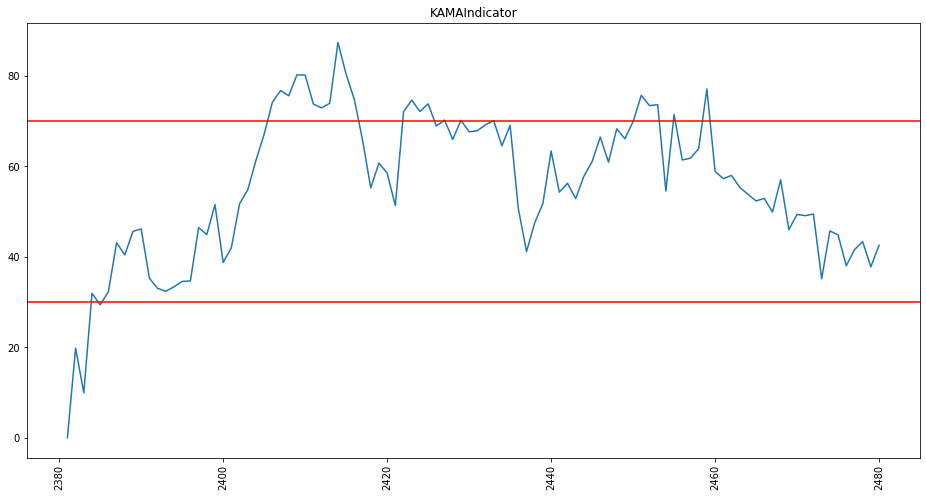

In [63]:
MoneyFlowIndex(data_full["High Price"][-100:], data_full["Low Price"][-100:], data_full["Close Price"][-100:], data_full["No.of Shares"][-100:]);

In [96]:
help(ta.others)

Help on module ta.others in ta:

NAME
    ta.others

DESCRIPTION
    .. module:: others
       :synopsis: Others Indicators.
    
    .. moduleauthor:: Dario Lopez Padial (Bukosabino)

FUNCTIONS
    cumulative_return(close, fillna=False)
        Cumulative Return (CR)
        
        Args:
            close(pandas.Series): dataset 'Close' column.
            fillna(bool): if True, fill nan values.
        
        Returns:
            pandas.Series: New feature generated.
    
    daily_log_return(close, fillna=False)
        Daily Log Return (DLR)
        
        https://stackoverflow.com/questions/31287552/logarithmic-returns-in-pandas-dataframe
        
        Args:
            close(pandas.Series): dataset 'Close' column.
            fillna(bool): if True, fill nan values.
        
        Returns:
            pandas.Series: New feature generated.
    
    daily_return(close, fillna=False)
        Daily Return (DR)
        
        Args:
            close(pandas.Series): dataset

In [101]:
# Momentum indicators
def daily_log_return(close):
    series = ta.others.daily_log_return(close)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(series)
    ax.set_title('Daily Log return')
    plt.xticks(rotation='vertical')
    return series

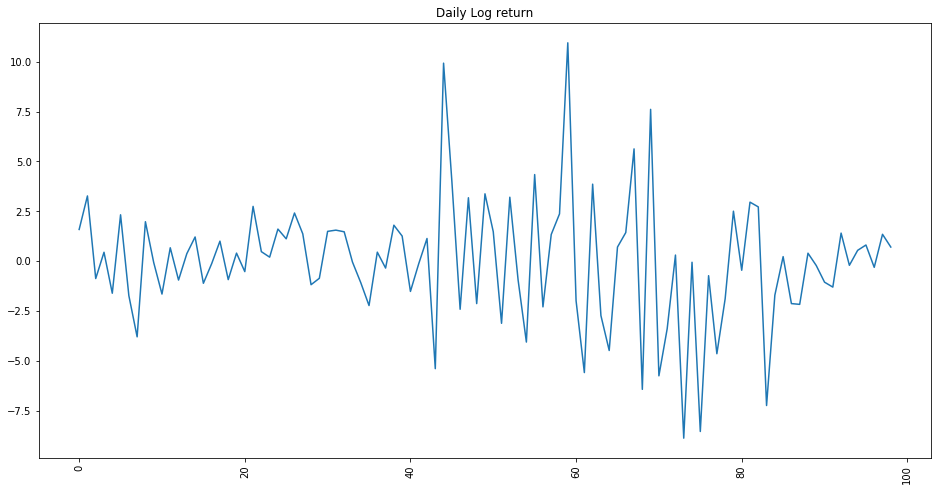

In [102]:
daily_log_return(data_full['Close Price'][-100:]);

In [94]:
def acc_dist_index(high, low, close, volume):
    series = ta.volume.acc_dist_index(high, low, close, volume)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(series)
    ax.set_title('KAMAIndicator')
    plt.xticks(rotation='vertical')
    return series

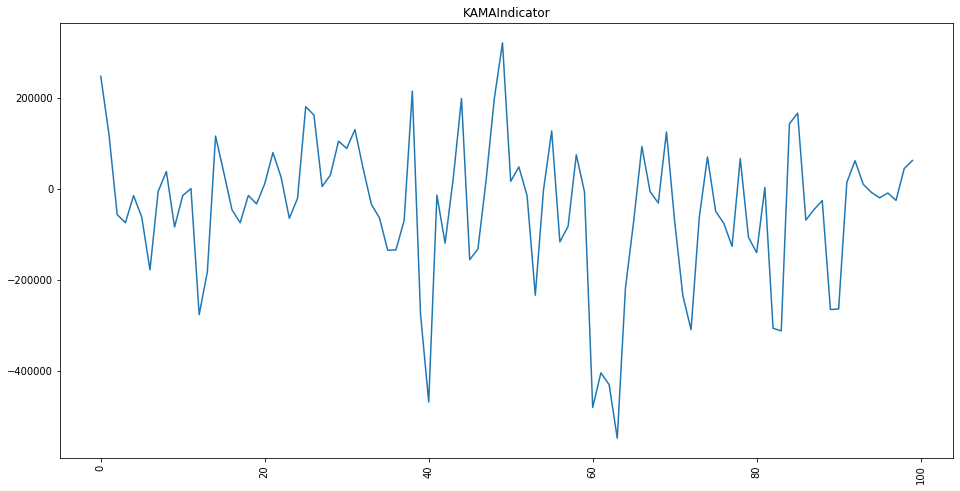

In [95]:
acc_dist_index(data_full["High Price"][-100:], data_full["Low Price"][-100:], data_full["Close Price"][-100:], data_full["No.of Shares"][-100:]);

In [92]:
def chaikin_money_flow(high, low, close, volume, period = 20):
    series = ta.volume.chaikin_money_flow(high, low, close, volume, n = period)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(series)
    ax.set_title('KAMAIndicator')
    plt.xticks(rotation='vertical')
    return series

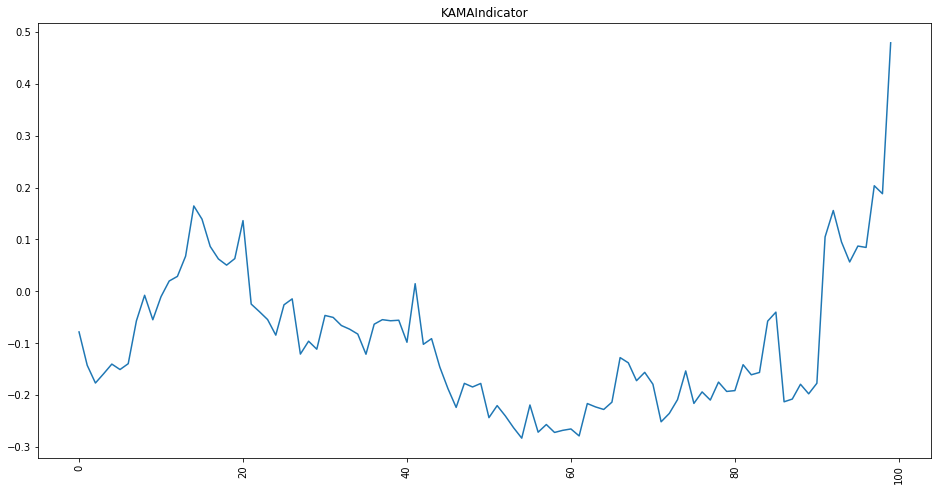

In [93]:
chaikin_money_flow(data_full["High Price"][-100:], data_full["Low Price"][-100:], data_full["Close Price"][-100:], data_full["No.of Shares"][-100:]);

In [90]:
def ease_of_movement(high, low, close, volume, period = 20):
    series = ta.volume.ease_of_movement(high, low, close, volume, n = period)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(series)
    ax.set_title('KAMAIndicator')
    plt.xticks(rotation='vertical')
    return series

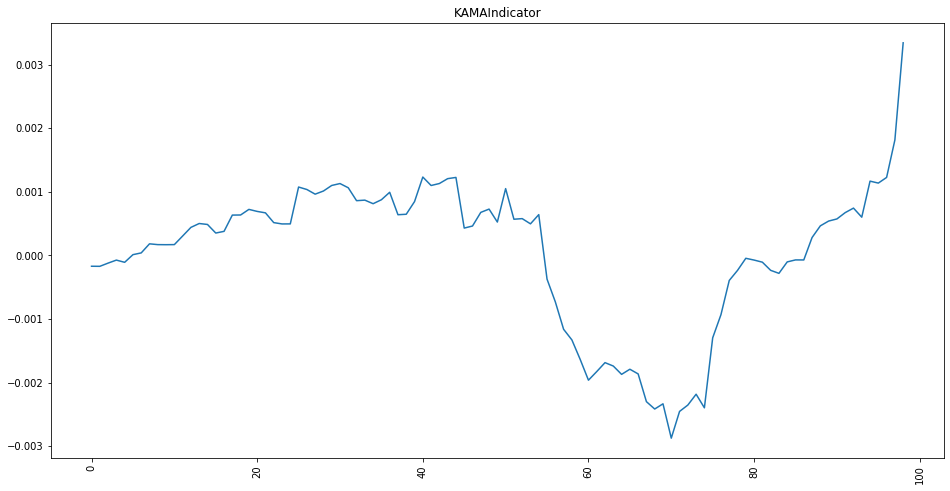

In [91]:
ease_of_movement(data_full["High Price"][-100:], data_full["Low Price"][-100:], data_full["Close Price"][-100:], data_full["No.of Shares"][-100:]);

In [68]:
# Momentum indicators
def tsi(close, r = 25, s = 13):
    series = ta.momentum.tsi(close,r,s)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(series)
    ax.set_title('TSI')
    plt.xticks(rotation='vertical')
    return series

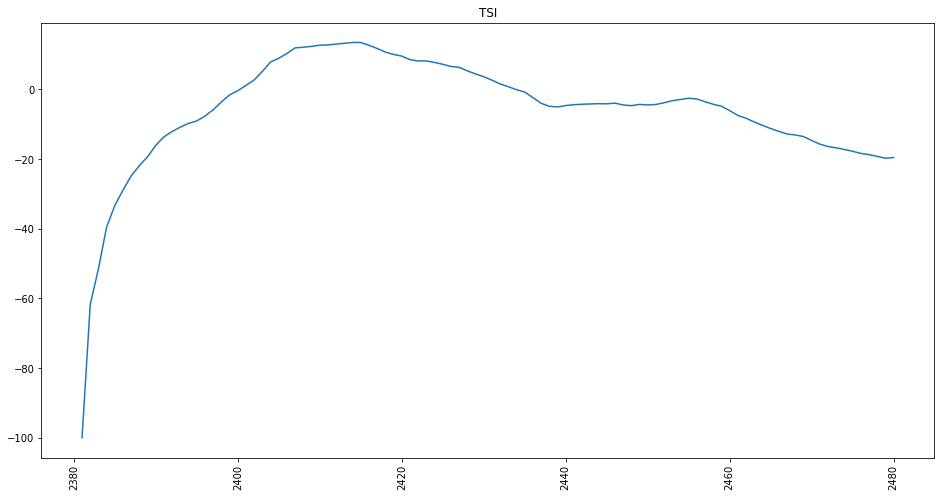

In [69]:
tsi(data_full['Close Price'][-100:]);

In [74]:
def average_true_range(high, low, close, period = 14):
    series = ta.volatility.average_true_range(high, low, close, n = period)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(series)
    ax.set_title('KAMAIndicator')
    plt.xticks(rotation='vertical')
    return series

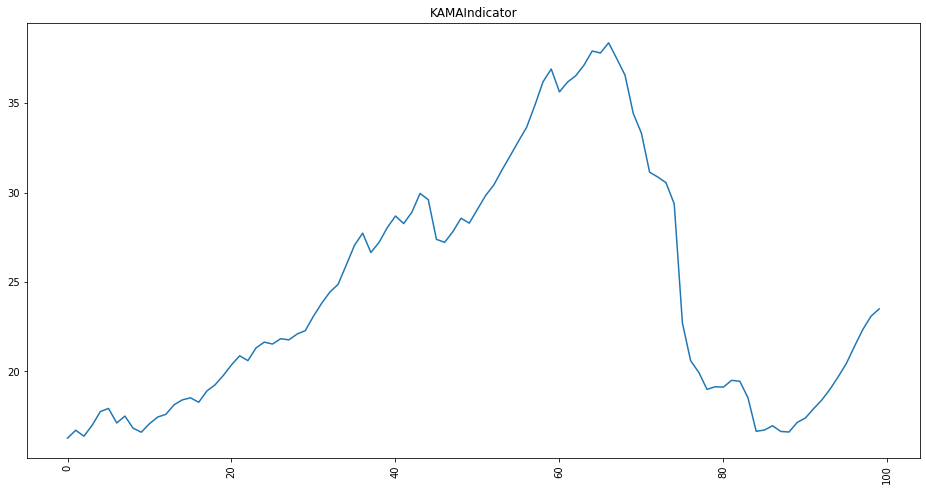

In [82]:
average_true_range(data_full["High Price"][-100:], data_full["Low Price"][-100:], data_full["Close Price"][-100:]);

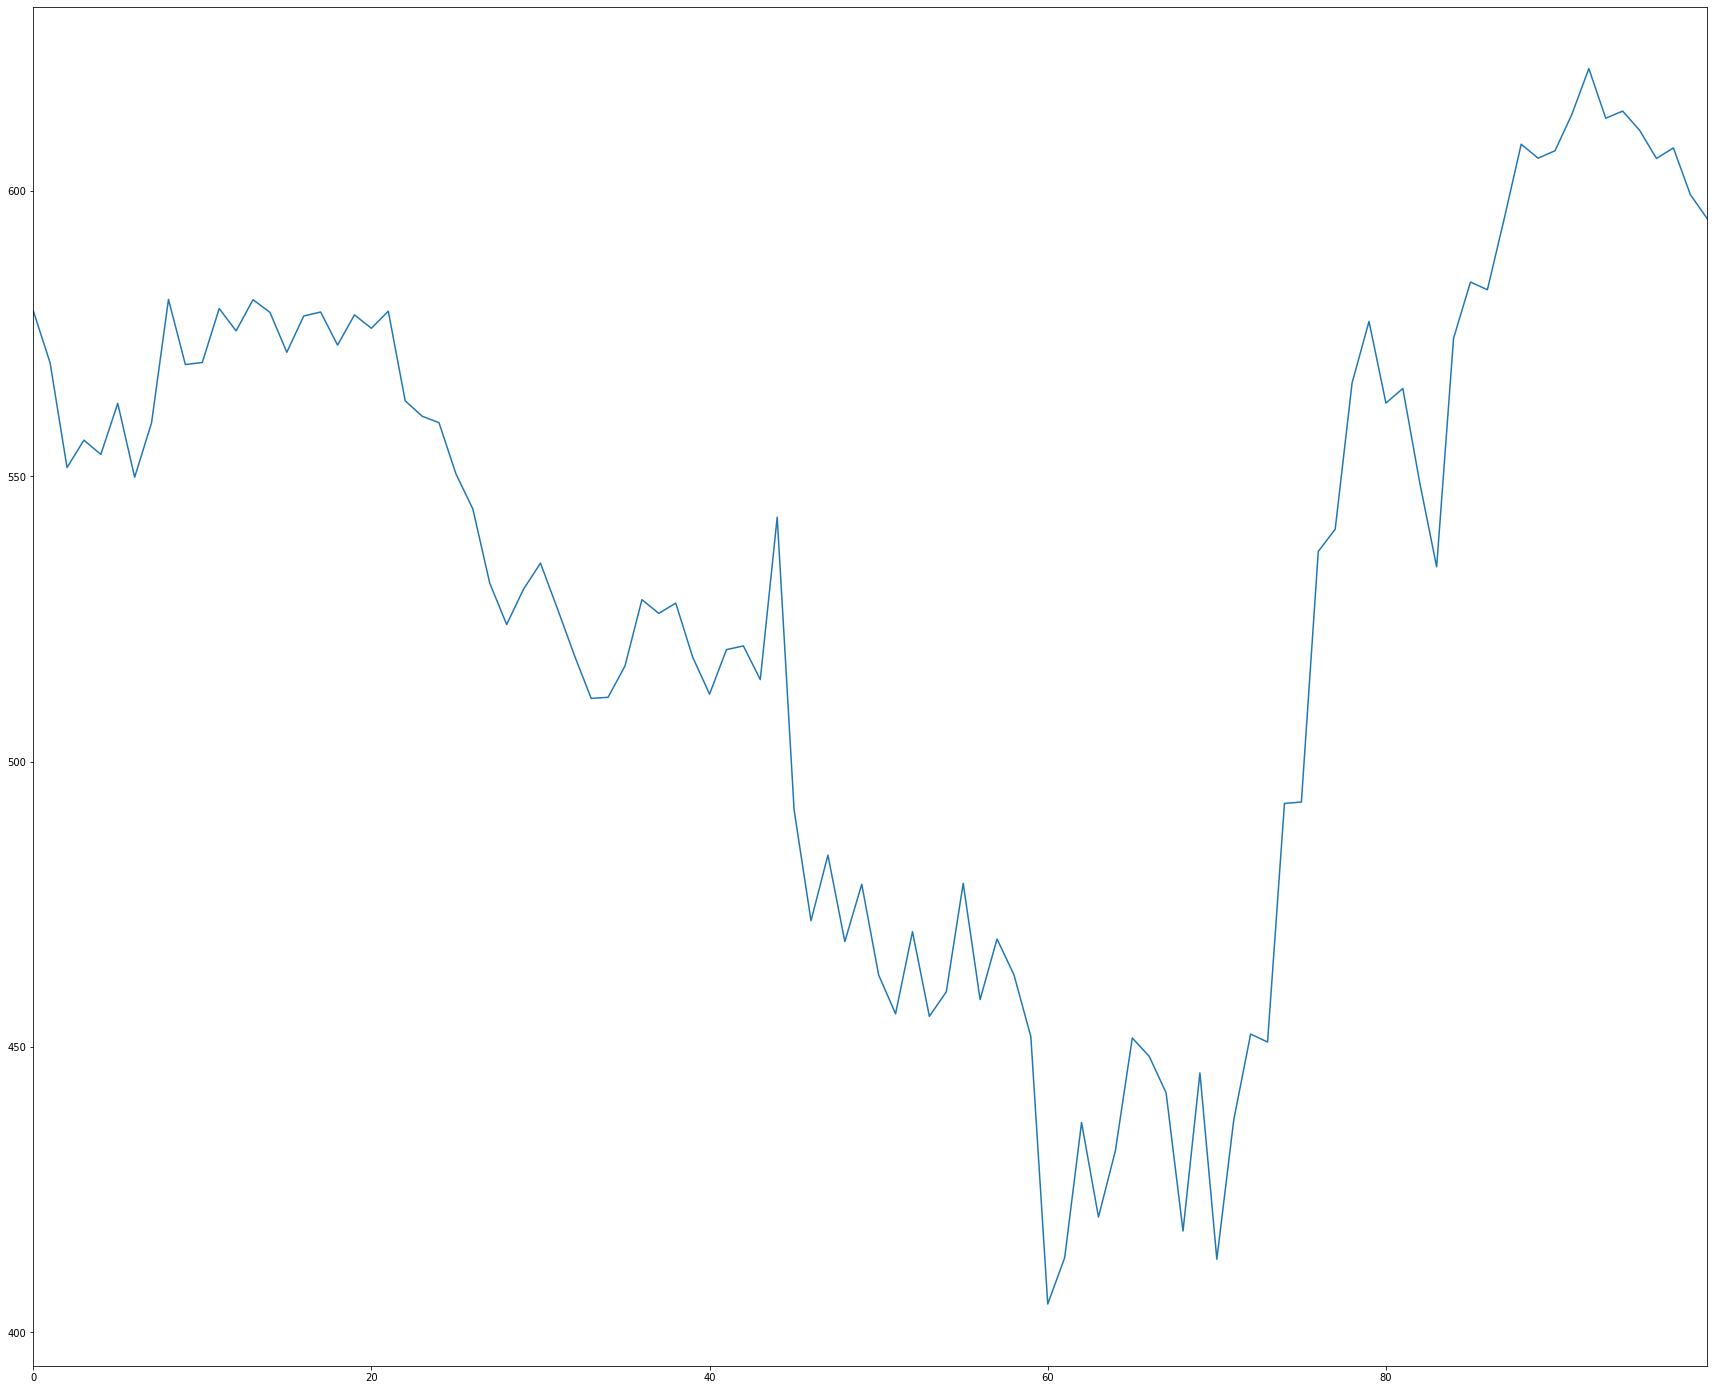

In [81]:
data_full['Close Price'][-100:].plot(figsize = [30,25])

In [83]:
data_full[-100:].head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
99,5-February-2020,588.35,598.45,585.6,595.10,594.367839,175843,3077,104515424.0,130835.0,74.40,12.85,6.75
98,6-February-2020,598.20,612.80,596.4,599.35,605.672759,61664,1853,37348205.0,16328.0,26.48,16.40,1.15
97,7-February-2020,612.00,612.00,599.6,607.50,605.931342,51487,1080,31197587.0,31678.0,61.53,12.40,-4.50
96,10-February-2020,608.80,611.15,601.8,605.65,605.646016,131410,4361,79587943.0,100844.0,76.74,9.35,-3.15
95,11-February-2020,610.00,613.55,606.8,610.60,610.846484,28655,1808,17503806.0,13479.0,47.04,6.75,0.60


In [85]:
def force_index(close, volume, period = 2):
    series = ta.volume.force_index(close, volume, n = period)
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(series)
    ax.set_title('KAMAIndicator')
    plt.axhline(y=30, color='r', linestyle='-')
    plt.axhline(y=70, color='r', linestyle='-')
    plt.xticks(rotation='vertical')
    return series

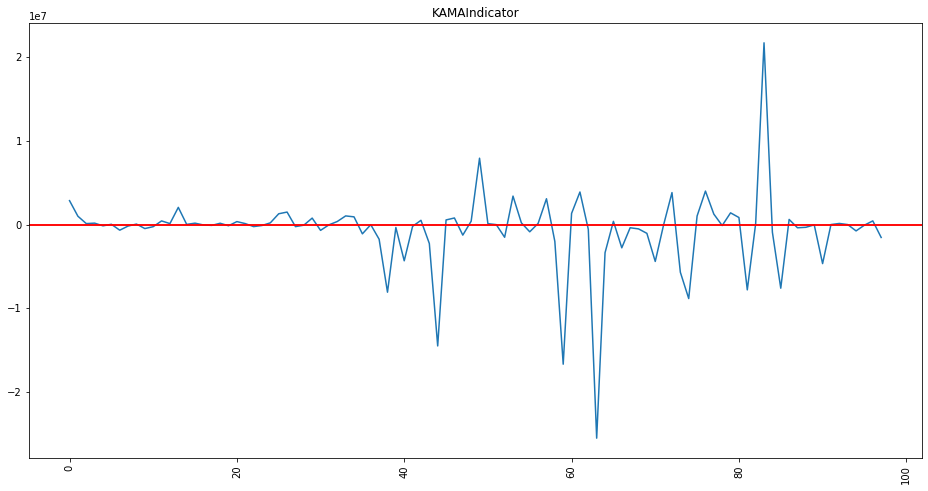

In [86]:
force_index(data_full["Close Price"][-100:], data_full["No.of Shares"][-100:]);